In [1]:
%config Completer.use_jedi = False

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, GRU, LSTM, InputLayer, Bidirectional, Dense
from tensorflow.keras.datasets import mnist

import numpy as np
import matplotlib.pyplot as plt

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train = x_train.reshape([-1, 28, 28]).astype("float32") / 255.0
x_test = x_test.reshape([-1, 28, 28]).astype("float32") / 255.0

In [5]:
model = keras.Sequential()
model.add(InputLayer(input_shape=(None, 28)))
model.add(SimpleRNN(512, return_sequences=True, activation="tanh"))
model.add(SimpleRNN(512, activation="tanh"))
model.add(Dense(10))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, None, 512)         276992    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 512)               524800    
_________________________________________________________________
dense (Dense)                (None, 10)                5130      
Total params: 806,922
Trainable params: 806,922
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"],
)

In [9]:
history = model.fit(x_train, y_train, batch_size=64, epochs=10, verbose=2)

Epoch 1/10
938/938 - 90s - loss: 0.3734 - accuracy: 0.8894
Epoch 2/10
938/938 - 90s - loss: 0.2678 - accuracy: 0.9227
Epoch 3/10
938/938 - 92s - loss: 0.2313 - accuracy: 0.9332
Epoch 4/10
938/938 - 89s - loss: 0.2074 - accuracy: 0.9393
Epoch 5/10
938/938 - 92s - loss: 0.2203 - accuracy: 0.9350
Epoch 6/10
938/938 - 88s - loss: 0.2109 - accuracy: 0.9397
Epoch 7/10
938/938 - 89s - loss: 0.2124 - accuracy: 0.9377
Epoch 8/10
938/938 - 96s - loss: 0.1957 - accuracy: 0.9427
Epoch 9/10
938/938 - 99s - loss: 0.2264 - accuracy: 0.9323
Epoch 10/10
938/938 - 93s - loss: 0.2077 - accuracy: 0.9391


In [10]:
acc = history.history['accuracy']
loss=history.history['loss']
print(acc)
print(loss)

[0.8894166946411133, 0.9226833581924438, 0.9331666827201843, 0.9392666816711426, 0.9349833130836487, 0.939716637134552, 0.9376833438873291, 0.9426833391189575, 0.9322666525840759, 0.9391000270843506]
[0.37336692214012146, 0.2678494155406952, 0.23133665323257446, 0.2073693871498108, 0.22032798826694489, 0.2109069973230362, 0.21242843568325043, 0.19570545852184296, 0.22636385262012482, 0.20772166550159454]


Text(0.5, 1.0, 'Training Accuracy and Loss')

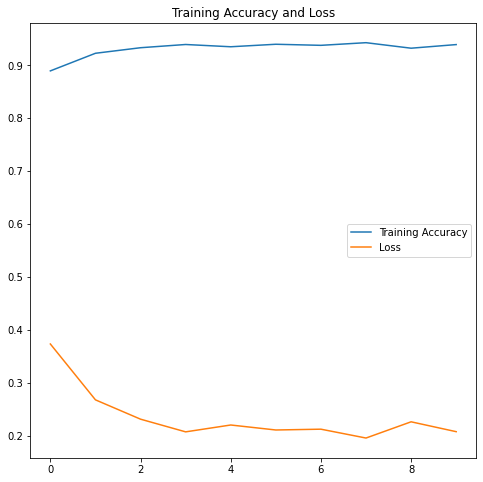

In [11]:
epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, loss, label='Loss')
plt.legend(loc='center right')
plt.title('Training Accuracy and Loss')

In [12]:
score = model.evaluate(x_test, y_test, batch_size=64, verbose=2)

157/157 - 2s - loss: 0.1721 - accuracy: 0.9502


In [13]:
model.save('saved_models/rnn_model.h5')